##### install yasa

In [1]:
!pip install --upgrade yasa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 117 kB/s 
     |████████████████████████████████| 7.5 MB 36.0 MB/s 
     |████████████████████████████████| 423 kB 47.0 MB/s 
     |████████████████████████████████| 365 kB 55.6 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 1.6 MB 49.0 MB/s 
  Created wheel for yasa: filename=yasa-0.6.2-py3-none-any.whl size=33797167 sha256=f79de657996a012cde6da58c706364664d77313dea34e35bbee9a7e248527c4f
  Stored in directory: /root/.cache/pip/wheels/52/8c/9c/1352fced5b6240ed1e3669f477d7ce0e2fe693e28b7bcc45f4
  Created wheel for pyriemann: filename=pyriemann-0.3-py2.py3-none-any.whl size=78033 sha256=25f00379edcf4869907ca94facb6e1cca92fc9d984af0c90f38e8cefa9db848c
  Stored in directory: /root/

# Spectrogram

This notebook demonstrates how to use YASA to plot a multi-taper spectrogram of a full-night single-channel EEG recording.

Please make sure to install the latest version of YASA first by typing the following line in your terminal or command prompt:

`pip install --upgrade yasa`

In [2]:
import yasa
import numpy as np
import matplotlib.pyplot as plt

## Load the data and hypnogram

We first load a full-night 3-channels dataset (Cz, Fz, Pz) sampled at 100 Hz. The data is in compressed NumPy format (*.npz*).

In [3]:
#구글드라이브 공유폴더에서 불러오기
!gdown --id 1z7uUvoDxHQhCCnIu48RwWspQy9mRRouV --output 02_data_full_6hrs_100Hz_Cz+Fz+Pz.npz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1z7uUvoDxHQhCCnIu48RwWspQy9mRRouV
To: /content/02_data_full_6hrs_100Hz_Cz+Fz+Pz.npz
100% 14.7M/14.7M [00:00<00:00, 172MB/s]


In [4]:
# Load EEG data
f = np.load('/content/02_data_full_6hrs_100Hz_Cz+Fz+Pz.npz')
data, ch_names = f['data'], f['chan']
sf = 100.
times = np.arange(data.size) / sf

print(data.shape, ch_names)
print(np.round(data[:, 0:5], 3))

(3, 2161058) ['Cz' 'Fz' 'Pz']
[[15.797 22.307 39.922 25.657 27.094]
 [16.896 26.385 40.966 21.833 24.456]
 [ 5.899 14.297 36.592 26.094 23.395]]


In [5]:
# For the sake of the example, we'll focus on CZ
data_cz = data[0, :]
data_cz.shape

(2161058,)

**Multi-taper spectrogram without the hypnogram**

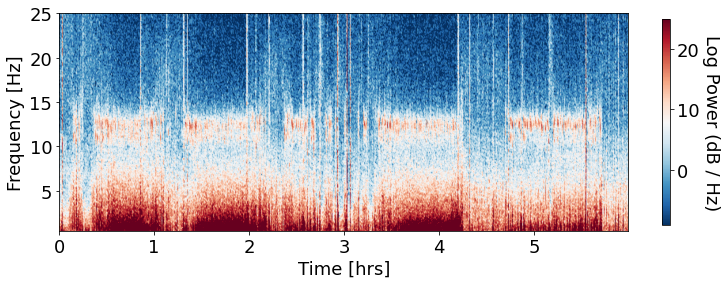

In [6]:
fig = yasa.plot_spectrogram(data_cz, sf)

**Multi-taper spectrogram with the hypnogram***

Next, we load the sleep staging vector (a.k.a hypnogram), which is a simple text file in which each value represents 30 seconds of data. Sleep stages are encoded as integer (*0: Wake, 1: N1 sleep, 2: N2 sleep, 3: N3 sleep, 4: REM sleep*).

In the code below, we load our 30-sec hypnogram and upsample it to match the sampling frequency and length of data, using YASA's built-in [hypno_upsample_to_data](https://raphaelvallat.com/yasa/build/html/generated/yasa.hypno_upsample_to_data.html#yasa.hypno_upsample_to_data) function.

Please refer to [08_bandpower.ipynb](08_bandpower.ipynb) for more details on how to manipulate hypnogram in YASA.

In [7]:
hypno_30s = np.loadtxt('https://raw.githubusercontent.com/beneyoung/yasa_basic/main/spindle_notebooks/data/03_data_full_6hrs_100Hz_hypno_30s.txt')
hypno = yasa.hypno_upsample_to_data(hypno=hypno_30s, sf_hypno=(1/30), data=data, sf_data=sf)
print(hypno.shape, 'Unique values =', np.unique(hypno))

(2161058,) Unique values = [0. 1. 2. 3. 4.]


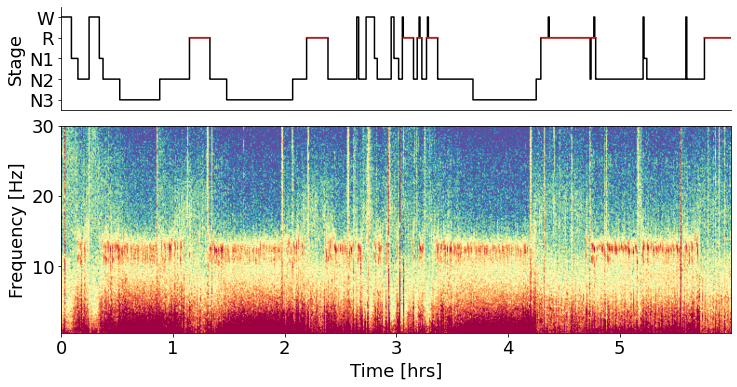

In [8]:
fig = yasa.plot_spectrogram(data_cz, sf, hypno=hypno, fmax=30, cmap='Spectral_r', trimperc=5)